<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👩‍💻 Build and Visualize a Perceptron from Scratch
## 🔍 Common Issues & Solutions
- Problem: Perceptron doesn't converge to separate classes.
    - Solution: Ensure your dataset is linearly separable and try a smaller learning rate.

- Problem: Loss fluctuates wildly during training.
    - Solution: Reduce your learning rate and check for proper weight initialization.

- Problem: Decision boundary visualization is blank or incorrect.
    - Solution: Verify your meshgrid covers the data range and check prediction function logic.

- Problem: Training is extremely slow.
    - Solution: Reduce the grid density for visualization and consider using NumPy vectorization.

## 🔑 Key Points
- The perceptron is the simplest form of a neural network, capable of learning linear boundaries.
- Learning rate significantly impacts training stability and convergence speed.
- Visualization of the decision boundary provides key insights into the learning process.
- Understanding this foundational model helps build intuition for more complex neural networks.

In [1]:
# Starter code
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# You'll be generating data and building your perceptron from scratch

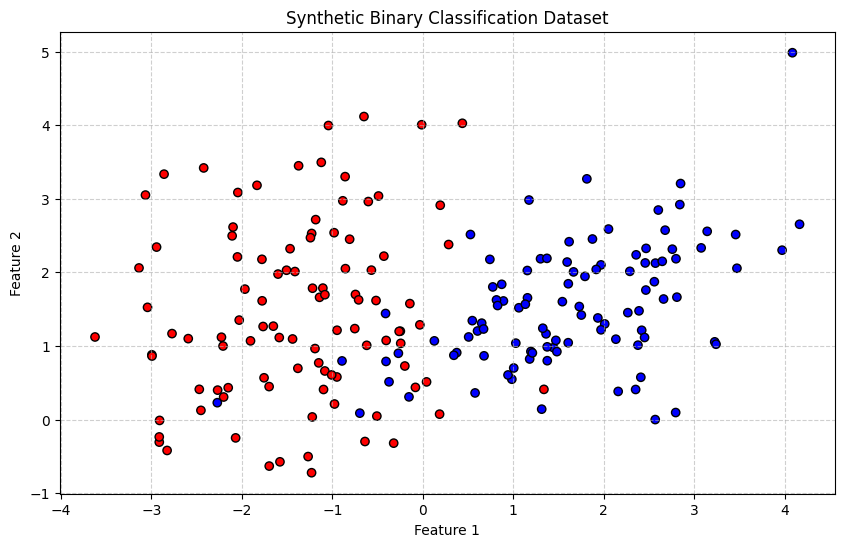

In [2]:
# Task 1: Generate and visualize the dataset
from sklearn.datasets import make_classification

# 1. Generate the synthetic dataset
# n_samples=200: Total data points
# n_features=2: x and y coordinates (features)
# class_sep=1.5: Increased to ensure clear linear separability
X_np, y_np = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# 2. Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [3]:
import torch.nn as nn

class Perceptron:
    def __init__(self, input_dim):
        # Initialize weights and bias with small random values
        # requires_grad=True allows PyTorch to compute gradients for these later
        self.weights = torch.rand(input_dim, 1, requires_grad=True) * 0.01
        self.bias = torch.zeros(1, requires_grad=True)

    def forward(self, X):
        # Linear combination: z = Xw + b
        # Using matrix multiplication (@)
        z = torch.mm(X, self.weights) + self.bias

        # Activation function: Sigmoid maps values to (0, 1)
        # Formula: 1 / (1 + exp(-z))
        prediction = torch.sigmoid(z)
        return prediction

    def calculate_loss(self, predictions, targets):
        # Using Mean Squared Error (MSE) for simplicity in this scratch implementation
        # Ensure targets are the same shape as predictions
        loss = torch.mean((predictions - targets)**2)
        return loss

# Test Your Work
# 1. Convert our numpy data to tensors
X_tensor = torch.from_numpy(X_np).float()
y_tensor = torch.from_numpy(y_np).float().view(-1, 1)

# 2. Create instance
model = Perceptron(input_dim=2)

# 3. Test forward pass
with torch.no_grad(): # Use no_grad for testing to avoid tracking this specific pass
    sample_output = model.forward(X_tensor[:5])

print(f"Sample predictions (first 5):\n{sample_output}")
print(f"Output range check: Min={sample_output.min():.4f}, Max={sample_output.max():.4f}")

Sample predictions (first 5):
tensor([[0.5004],
        [0.5115],
        [0.5129],
        [0.5064],
        [0.5054]])
Output range check: Min=0.5004, Max=0.5129


In [6]:
import torch

class Perceptron:
    def __init__(self, input_dim):
        # Initialize weights and bias as trainable PyTorch tensors
        # requires_grad=True is the key to fixing the NoneType error
        self.weights = torch.randn(input_dim, 1, requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True)

    def forward(self, X):
        # Matrix multiplication must use the trainable tensors
        # Formula: sigmoid(X * weights + bias)
        z = torch.mm(X, self.weights) + self.bias
        return torch.sigmoid(z)

    def calculate_loss(self, predictions, targets):
        # Mean Squared Error: mean((y_pred - y_true)^2)
        return torch.mean((predictions - targets)**2)

# Reset your data and model
X_tensor = torch.from_numpy(X_np).float()
y_tensor = torch.from_numpy(y_np).float().view(-1, 1)
model = Perceptron(input_dim=2)

In [7]:
def train(model, X, y, lr=0.1, epochs=100):
    history = {'loss': [], 'weights': [], 'bias': []}

    for epoch in range(epochs):
        # 1. Forward Pass
        predictions = model.forward(X)

        # 2. Calculate Loss
        loss = model.calculate_loss(predictions, y)

        # 3. Backward Pass (Computing Gradients)
        # Clear old gradients first
        if model.weights.grad is not None:
            model.weights.grad.zero_()
            model.bias.grad.zero_()

        loss.backward()

        # 4. Manual Weight Update
        # By using torch.no_grad(), we modify tensors without creating a new graph
        with torch.no_grad():
            model.weights -= lr * model.weights.grad
            model.bias -= lr * model.bias.grad

        # Store for Task 4
        history['loss'].append(loss.item())
        history['weights'].append(model.weights.clone().detach())
        history['bias'].append(model.bias.clone().detach())

        if epoch % 10 == 0:
            print(f"Epoch {epoch:3d} | Loss: {loss.item():.6f}")

    return history

# Run the training
training_history = train(model, X_tensor, y_tensor, lr=0.1, epochs=100)

Epoch   0 | Loss: 0.137774
Epoch  10 | Loss: 0.111873
Epoch  20 | Loss: 0.098026
Epoch  30 | Loss: 0.089570
Epoch  40 | Loss: 0.083838
Epoch  50 | Loss: 0.079657
Epoch  60 | Loss: 0.076448
Epoch  70 | Loss: 0.073891
Epoch  80 | Loss: 0.071797
Epoch  90 | Loss: 0.070044


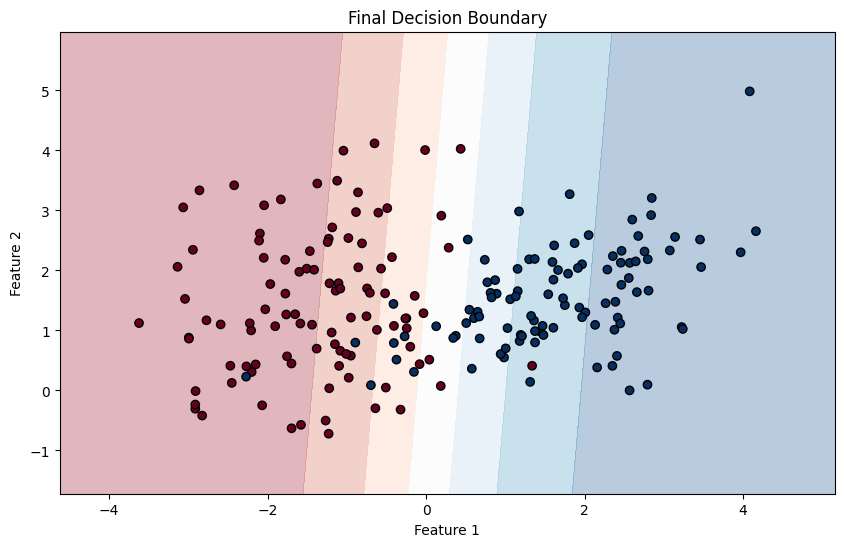

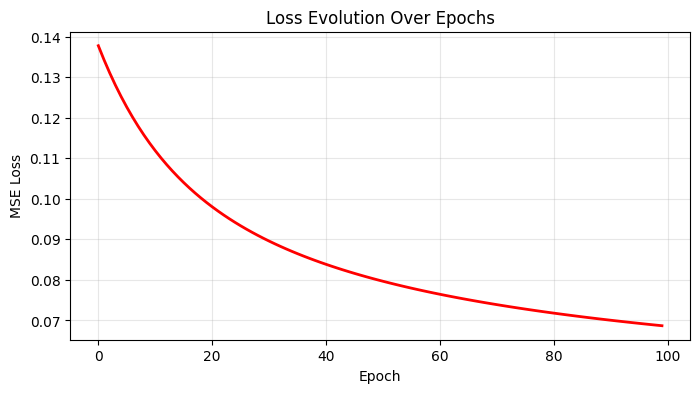

In [8]:
def plot_decision_boundary(model, X, y, epoch_idx=None):
    plt.figure(figsize=(10, 6))

    # 1. Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. Make predictions across the grid
    grid_points = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    with torch.no_grad():
        Z = model.forward(grid_points).reshape(xx.shape).numpy()

    # 3. Plot contour and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='RdBu', label='Data Points')

    title = "Final Decision Boundary" if epoch_idx is None else f"Decision Boundary at Epoch {epoch_idx}"
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize the final result
plot_decision_boundary(model, X_np, y_np)

# Plot Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(training_history['loss'], color='red', lw=2)
plt.title("Loss Evolution Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True, alpha=0.3)
plt.show()

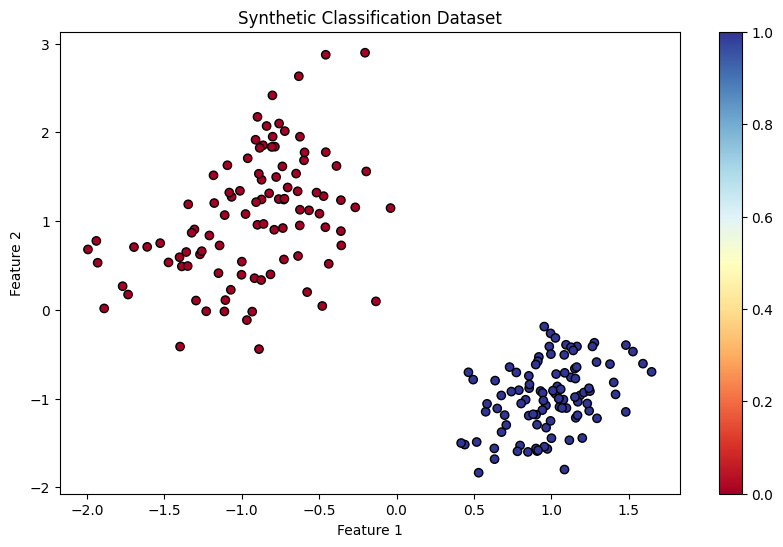

Epoch 0/10, Loss: 0.1863, Accuracy: 0.9950
Epoch 2/10, Loss: 0.0345, Accuracy: 1.0000
Epoch 4/10, Loss: 0.0212, Accuracy: 1.0000
Epoch 6/10, Loss: 0.0157, Accuracy: 1.0000
Epoch 8/10, Loss: 0.0126, Accuracy: 1.0000
Epoch 9/10, Loss: 0.0115, Accuracy: 1.0000


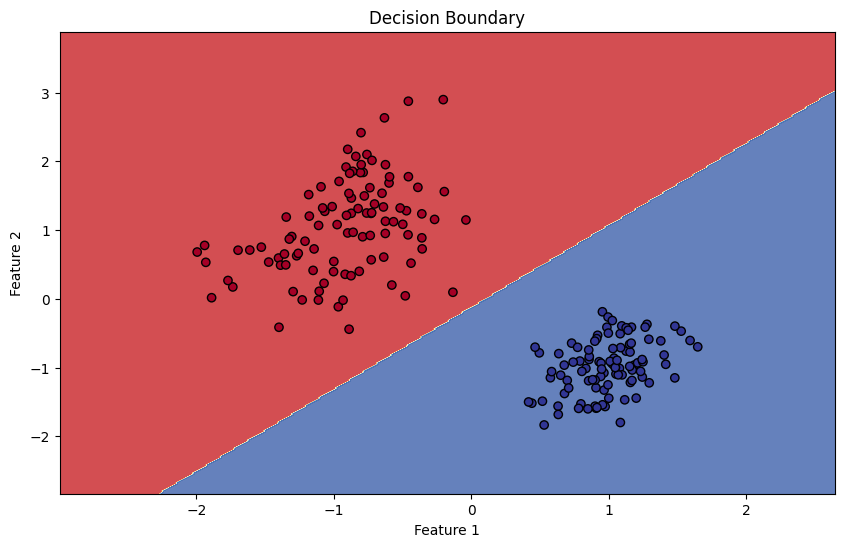

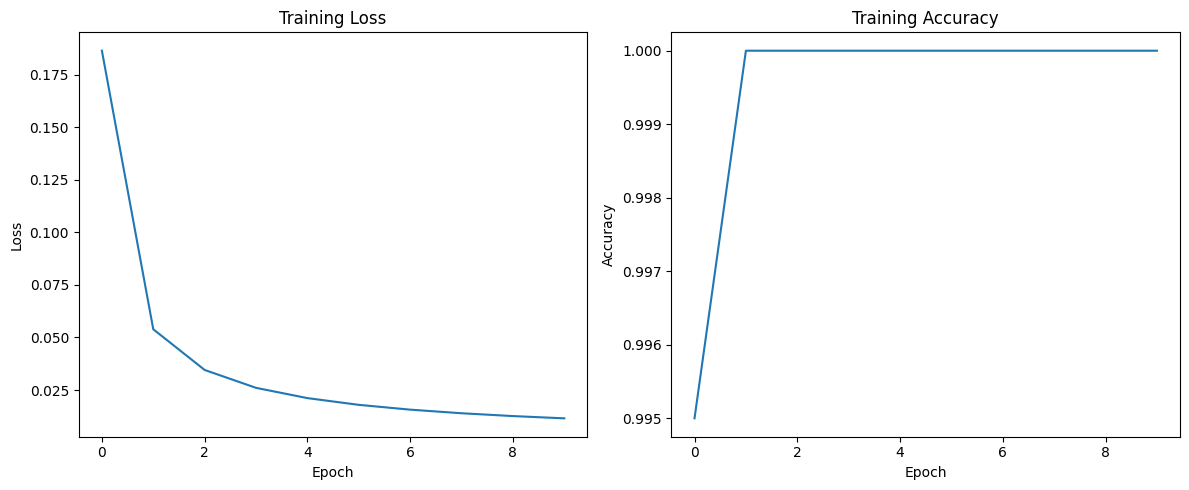

<Figure size 800x600 with 0 Axes>

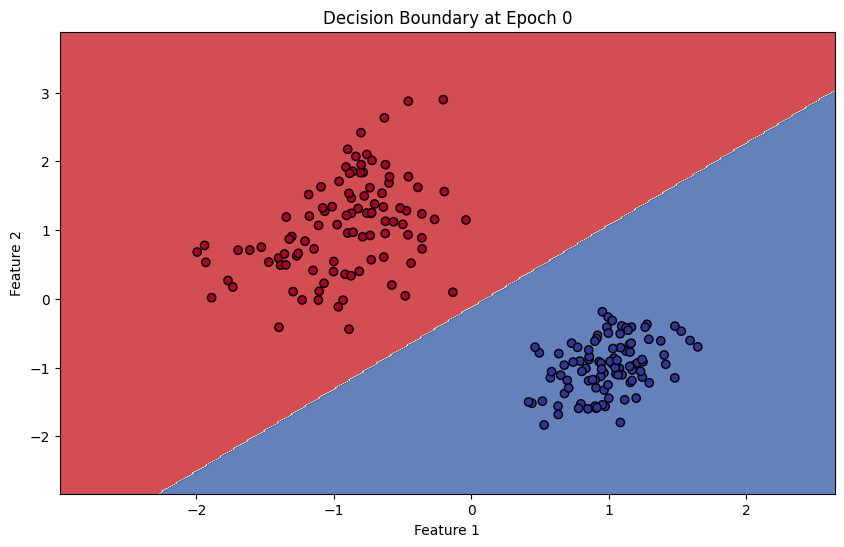

<Figure size 800x600 with 0 Axes>

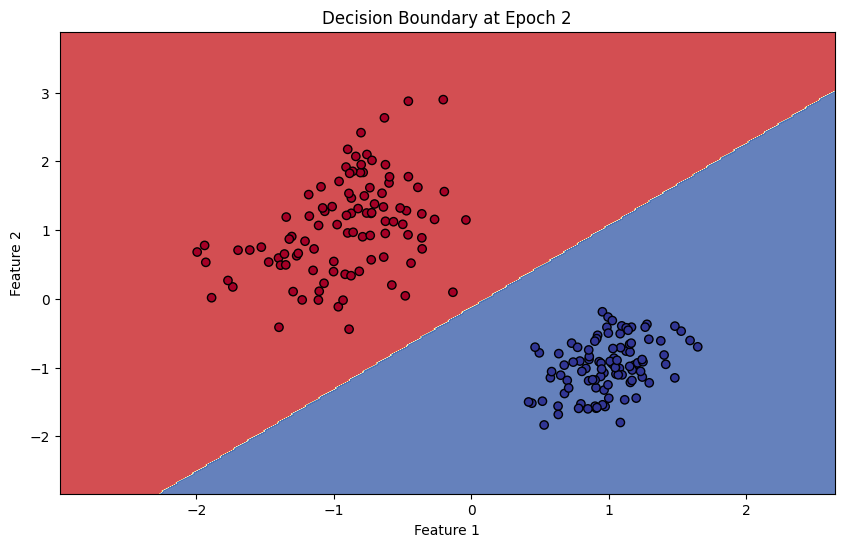

<Figure size 800x600 with 0 Axes>

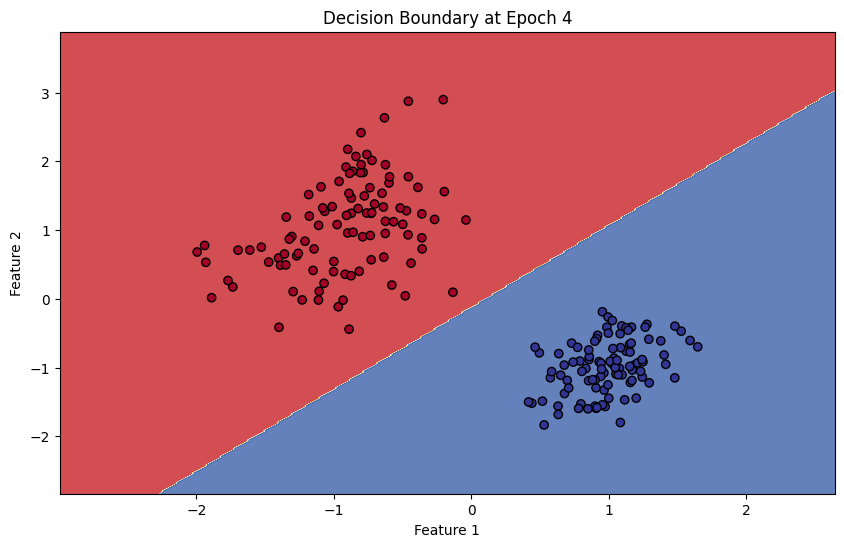

<Figure size 800x600 with 0 Axes>

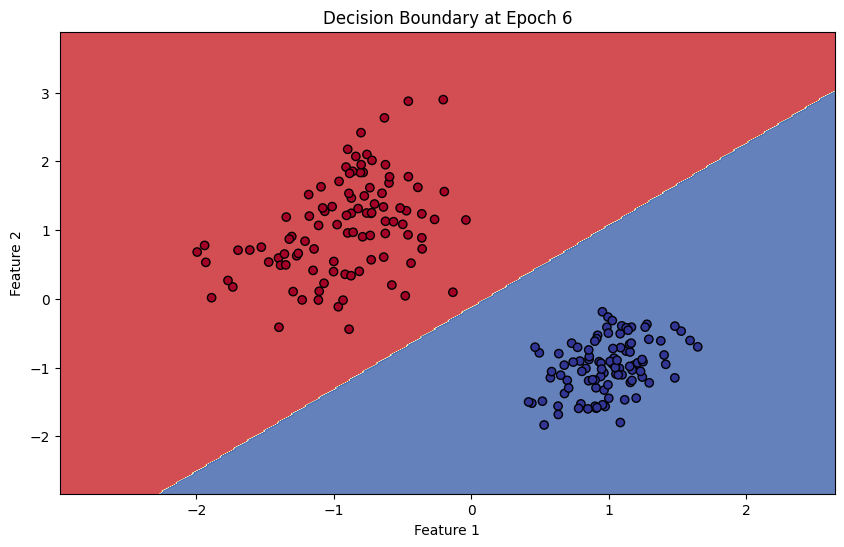

<Figure size 800x600 with 0 Axes>

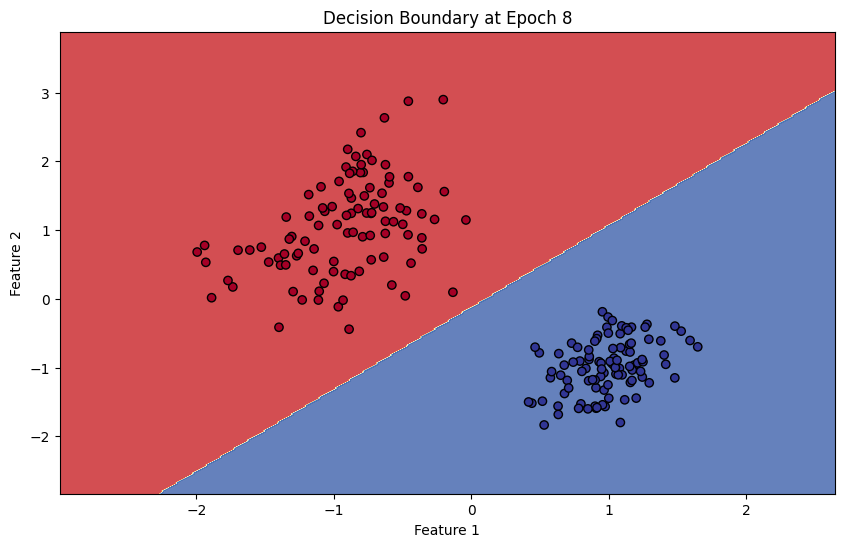

In [9]:



## Exemplar Solution
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Task 1: Create and visualize synthetic dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=88,
    n_clusters_per_class=1,
    class_sep=1.0
)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Visualize dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Task 2: Build a Perceptron class
class Perceptron:
    def __init__(self, input_dim):
        # Initialize weights with small random values
        self.weights = torch.randn(input_dim, dtype=torch.float32, requires_grad=True) * 0.01
        self.bias = torch.randn(1, dtype=torch.float32, requires_grad=True) * 0.01

        # Store training history
        self.weight_history = []
        self.loss_history = []
        self.accuracy_history = []

    def forward(self, x):
        # Linear combination of inputs and weights
        linear_output = torch.dot(self.weights, x) + self.bias

        # Apply sigmoid activation
        return torch.sigmoid(linear_output)

    def calculate_loss(self, y_pred, y_true):
        # Binary cross-entropy loss
        epsilon = 1e-10  # Small value to avoid log(0)
        return -((y_true * torch.log(y_pred + epsilon)) +
                ((1 - y_true) * torch.log(1 - y_pred + epsilon)))

    # Task 3: Train the Perceptron
    def train(self, X, y, epochs=10, lr=0.01, verbose=True):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)

        for epoch in range(epochs):
            total_loss = 0
            correct = 0

            # Store current weights for visualization
            if epoch % 2 == 0:
                self.weight_history.append((self.weights.clone().detach(),
                                           self.bias.clone().detach()))

            for i in range(X_tensor.shape[0]):
                # Forward pass
                y_pred = self.forward(X_tensor[i])

                # Calculate loss
                loss = self.calculate_loss(y_pred, y_tensor[i])
                total_loss += loss.item()

                # Calculate accuracy
                prediction = 1 if y_pred >= 0.5 else 0
                if prediction == y_tensor[i]:
                    correct += 1

                # Calculate error/gradient
                error = y_tensor[i] - y_pred

                # Update weights and bias
                self.weights = self.weights + lr * error * X_tensor[i]
                self.bias = self.bias + lr * error

            # Calculate epoch statistics
            avg_loss = total_loss / len(X)
            accuracy = correct / len(X)

            # Store history
            self.loss_history.append(avg_loss)
            self.accuracy_history.append(accuracy)

            # Print progress
            if verbose and (epoch % 2 == 0 or epoch == epochs-1):
                print(f'Epoch {epoch}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

# Task 4: Visualize Decision Boundaries
def plot_decision_boundary(perceptron, X, y, weights=None, bias=None):
    # Define the plot boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Use provided weights or current perceptron weights
    w = weights if weights is not None else perceptron.weights.detach().numpy()
    b = bias if bias is not None else perceptron.bias.item()

    # Create predictions for all grid points
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            features = np.array([xx[i, j], yy[i, j]])
            # Convert to tensor for perceptron
            features_tensor = torch.tensor(features, dtype=torch.float32)
            Z[i, j] = 1 if perceptron.forward(features_tensor).item() >= 0.5 else 0

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    return plt

# Create and train the perceptron
perceptron = Perceptron(input_dim=2)
perceptron.train(X, y, epochs=10, lr=0.05)

# Plot final decision boundary
plot_decision_boundary(perceptron, X, y)
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(perceptron.loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(perceptron.accuracy_history)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# Visualize decision boundary evolution
if len(perceptron.weight_history) > 0:
    for i, (weights, bias) in enumerate(perceptron.weight_history):
        plt.figure(figsize=(8, 6))
        plot_decision_boundary(perceptron, X, y, weights.numpy(), bias.item())
        plt.title(f'Decision Boundary at Epoch {i*2}')
        plt.show()